<a href="https://colab.research.google.com/github/simonecrepaldi/desafio_analise_exploratoria/blob/main/desafio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO TERA - ANÁLISE EXPLORATÓRIA**

Este foi o primeiro desafio proposto no curso e foram disponibilizados três datasets e o roteiro a ser seguido.


# Importando os arquivos do Drive e as bibliotecas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import math

dados1 = pd.read_csv('/content/drive/MyDrive/Desafio1/dataset1.csv', encoding='iso8859-1')
dados2 = pd.read_csv('/content/drive/MyDrive/Desafio1/dataset2.csv', encoding='iso8859-1')
dados3 = pd.read_csv('/content/drive/MyDrive/Desafio1/dataset3.csv', encoding='iso8859-1')

# Obtendo informações sobre o Dataset1

In [4]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               106 non-null    int64 
 1   Name             105 non-null    object
 2   Platform         97 non-null     object
 3   Year_of_Release  105 non-null    object
 4   Genre            105 non-null    object
 5   Publisher        105 non-null    object
 6   NA_Sales         105 non-null    object
 7   EU_Sales         105 non-null    object
 8   JP_Sales         101 non-null    object
 9   Other_Sales      105 non-null    object
 10  Global_Sales     77 non-null     object
dtypes: int64(1), object(10)
memory usage: 9.2+ KB


**Quantas linhas e quantas colunas esse dataset possui?**

106 linhas e 11 colunas.

In [5]:
dados1.head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,"1,0",31.37


**Faça um dicionário das colunas contendo o nome da coluna, o tipo do dado e seu significado**


In [6]:
dados1.columns

Index(['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

**Dicionário das colunas do dataset1:**
* **ID:** Número de identificação do jogo
* **Name:** Nome do jogo
* **Platform:** Plataforma em que o jogo foi lançado
* **Year_of_Release:** Ano de lançamento do jogo
* **Genre:** Gênero/categoria do jogo
* **Publisher:** Empresa responsável pela publicação/distribuição do jogo
* **NA_Sales:** Vendas na América do Norte
* **EU_Sales:** Vendas na Europa
* **JP_Sales:** Vendas no Japão
* **Other_Sales:** Vendas em outros lugares do mundo
* **Global_Sales:** Total de vendas global

**Classificação das variáveis:**
* **ID:** qualitativa ordinal
* **Name:** qualitativa nominal
* **Platform:** qualitativa nominal
* **Year_of_Release:** qualitativa ordinal
* **Genre:** qualitativa nominal
* **Publisher:** qualitativa nominal
* **NA_Sales:** quantitativa discreta
* **EU_Sales:** quantitativa discreta
* **JP_Sales:** quantitativa discreta
* **Other_Sales:** quantitativa discreta
* **Global_Sales:** quantitativa discreta

**Descreva se o Dataset está em formato Tidy e explique o motivo. Caso não esteja, crie uma versão Tidy para a exploração.**

O Dataset1 não está no formato Tidy.
Uma forma de apresentar o dataset1 em formato Tidy seria apresentar 4 ids para cada jogo por região com a quantidade de vendas, ao invés de apresentar 1 id com as vendas separadas em colunas.

#Validação de dados e entendimento das variáveis

**Quantos registros faltantes (dados nulos) por coluna?**

In [7]:
dados1.isnull().sum()

Id                  0
Name                1
Platform            9
Year_of_Release     1
Genre               1
Publisher           1
NA_Sales            1
EU_Sales            1
JP_Sales            5
Other_Sales         1
Global_Sales       29
dtype: int64

**Avalie a unicidade dos dados. Há duplicatas de linhas?**

A unicidade dos dados está na coluna "Id".

In [8]:
dados1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool

**Há algum problema com os tipos das variáveis?**

As variáveis de "sales" deveriam ser do tipo numeral, e não do tipo object.

In [9]:
dados1.dtypes

Id                  int64
Name               object
Platform           object
Year_of_Release    object
Genre              object
Publisher          object
NA_Sales           object
EU_Sales           object
JP_Sales           object
Other_Sales        object
Global_Sales       object
dtype: object

**Descreva o conteúdo de cada coluna, se atentando ao tipo de variável:**
1. Qualitativas: quantas categorias distintas? Qual a distribuição por categoria?
Temos duas categorias distintas: nominal (Name, Platform, Genre e Publisher) e ordinal (ID e Year_of_Release).

2. Quantitativas: valores mínimo e máximo. Média e desvio padrão. Mediana, P25 e P75.

In [10]:
dados1.describe()

,Id
count,106.000000
mean,51.443396
std,28.997892
min,1.000000
25%,26.250000
50%,52.500000
75%,77.750000
max,100.000000


In [11]:
dados1.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id    52.5
dtype: float64

# Gráficos para visualização dos dados

Obs: Gráficos gerados antes da limpeza dos dados

**Gráfico 01 - Distribuição da quantidade de jogos por plataforma**


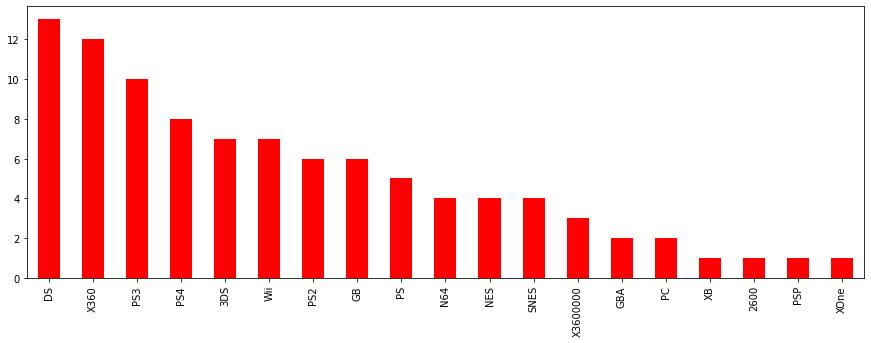

In [12]:
dados1['Platform'].value_counts().plot(kind='bar', figsize=(15,5), color='red')



---



**Gráfico 02 - Distribuição dos jogos por gênero**

Podemos observar que o gênero mais procurado é o de tiro e o menos procurado o de aventura.

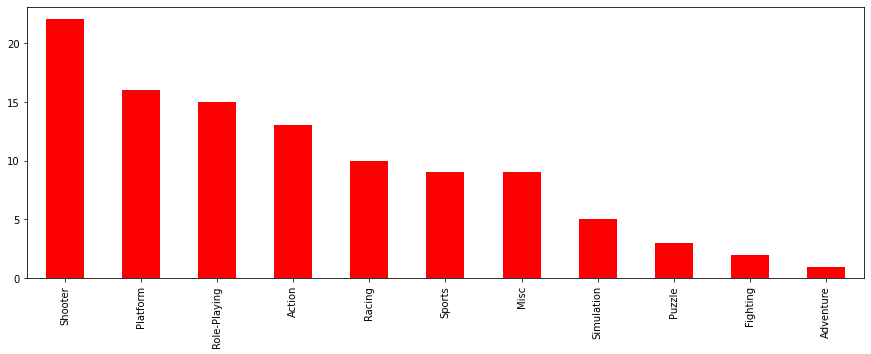

In [13]:
dados1['Genre'].value_counts().plot(kind='bar', figsize=(15,5), color='red')



---



**Gráfico 03 - Jogos lançados ao longo dos anos**

O ano com mais lançamento de jogos é 2009, seguido pelo ano de 2005.

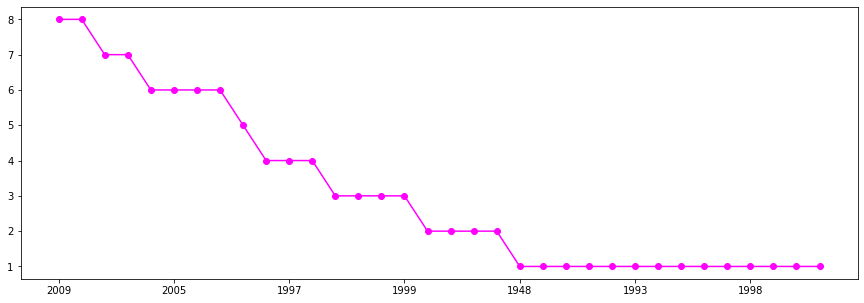

In [16]:
dados1['Year_of_Release'].value_counts().plot(figsize=(15,5), marker='o', color='magenta')



---



**Gráfico 04 - Jogos por distribuidora**

A distribuidora que mais tem jogos é a Nintendo, mas ao analisar os dados vemos que tem quatro escritas diferentes para a mesma empresa (Nintendo, Ñintendo, nintendo, NINTENDO). Na etapa de limpeza de dados precisamos padronizar a escrita para que a contagem de dados fique correta.
O gráfico mostra que a diferença da Nintendo para as outras distribuidoras é bem expressivo.

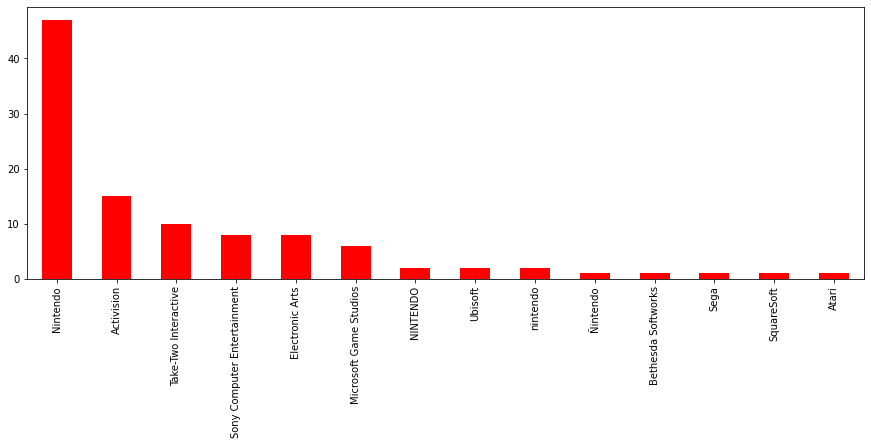

In [17]:
dados1['Publisher'].value_counts().plot(figsize=(15,5), kind='bar', color='red')

#Distribuição dos dados

**Como está a distribuição dos dados? Existem valores discrepantes? Descreva o que pode significar.**

---

**Quais conclusões você pode tirar até aqui? Você está lidando com dados de qualidade? Existe alguma relação com a coleta? Há dados pessoais expostos?**

Não há dados pessoais expostos.

#**Limpeza dos Dados**
Caso aplicável, dê uma tratativa para os seguintes itens e explique o motivo da solução aplicada.

1. Valores nulos.

2. Registros duplicados.

3. Validade dos tipos dos dados.

4. Valores discrepantes.

5. Dados inconsistentes.


Antes de começar a fazer a limpeza de dados, vamos criar uma cópia do dataset1 para não perder nenhuma informação e trabalhar apenas com a cópia a partir de agora.

In [18]:
novodados1 = dados1.copy()

In [19]:
novodados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               106 non-null    int64 
 1   Name             105 non-null    object
 2   Platform         97 non-null     object
 3   Year_of_Release  105 non-null    object
 4   Genre            105 non-null    object
 5   Publisher        105 non-null    object
 6   NA_Sales         105 non-null    object
 7   EU_Sales         105 non-null    object
 8   JP_Sales         101 non-null    object
 9   Other_Sales      105 non-null    object
 10  Global_Sales     77 non-null     object
dtypes: int64(1), object(10)
memory usage: 9.2+ KB


**Verficar se há dados duplicados**

In [20]:
novodados1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool

A unicidade está na coluna Id, então conseguimos verificar quais são as linhas que estão duplicadas.

In [21]:
novodados1.Id.value_counts()

78     3
83     2
61     2
17     2
86     2
      ..
32     1
31     1
30     1
29     1
100    1
Name: Id, Length: 100, dtype: int64

In [22]:
novodados1[novodados1.Id.isin([78, 83, 61, 17, 86])]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
17,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
61,61,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.73,2.56,0.04,0.91,10.25
62,61,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.73,2.56,0.04,0.91,10.25
79,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
80,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
81,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
86,83,GoldenEye 007,N64,1997,Shooter,nintendo,5.8,2.01,0.13,0.15,NaN
87,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,86,The Sims 3,PC,2009,Simulation,Electronic Arts,0.99,6.42,NaN,0.6,8.01


**Limpeza de valores nulos**

Os campos que estiverem com valores nulos aparecerão com o valor NaN (Not a Number). Podemos utilizar uma função do pandas que irá retornar a soma de todas as linhas do dataset1 que tiverem valores nulos.

In [23]:
novodados1.isnull().sum()

Id                  0
Name                1
Platform            9
Year_of_Release     1
Genre               1
Publisher           1
NA_Sales            1
EU_Sales            1
JP_Sales            5
Other_Sales         1
Global_Sales       29
dtype: int64

Dessa forma, sabemos que na coluna "Vendas Global" temos 29 valores nulos, na coluna "Plataforma" temos 9, na coluna "Vendas Japão" temos 5 e nas demais colunas (exceto coluna ID) temos 1 valor nulo cada.

Agora precisamos avaliar o que fazer para resolver isso. No caso da coluna "Vendas Global", sabemos que ela é o somatório das demais vendas, portanto podemos aplicar uma fórmula que faça o somatório do valor das outras colunas e apresente o resultado.

Podemos considerar, no caso dos valores nulos da coluna "Vendas Japão", que o resultado será o valor de "Vendas Global" subtraído dos outros valores ("Vendas América do Norte", "Vendas Europa" e "Outras Vendas"). Seguimos a mesma lógica para as demais colunas de vendas ("Vendas América do Norte", "Vendas Europa" e "Outras Vendas") que possuem um valor nulo cada.

#Corrigindo os dados da coluna "Publisher"

In [24]:
novodados1.Publisher.value_counts()

Nintendo                       47
Activision                     15
Take-Two Interactive           10
Sony Computer Entertainment     8
Electronic Arts                 8
Microsoft Game Studios          6
NINTENDO                        2
Ubisoft                         2
nintendo                        2
Ñintendo                        1
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: Publisher, dtype: int64

Podemos observar que existe 4 escritas diferentes para uma mesma distribuidora: Nintendo, NINTENDO, nintendo e Ñintendo.
Vamos padronizar para "Nintendo".
Nesta coluna este é o único problema que conseguimos verificar no momento.

In [25]:
cond = novodados1['Publisher'].isin(['nintendo', 'NINTENDO', 'Ñintendo'])
novodados1.loc[cond, 'Publisher'] = 'Nintendo'

In [26]:
novodados1.Publisher.value_counts()

Nintendo                       52
Activision                     15
Take-Two Interactive           10
Sony Computer Entertainment     8
Electronic Arts                 8
Microsoft Game Studios          6
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: Publisher, dtype: int64

Agora vamos analisar qual a linha que tem valor nulo na coluna Publisher e como podemos corrigir isso.

In [27]:
novodados1[novodados1.Publisher.isnull()].head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
87,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos observar que todos os dados da linhas 87 possuem valor nulo, portanto podemos excluir a linha toda do nosso dataset sem perda de informação.

#Corrigindo os dados da coluna "Year_of_Release"


In [28]:
novodados1[['Year_of_Release']].describe()

,Year_of_Release
count,105
unique,34
top,2009
freq,8


In [29]:
novodados1['Year_of_Release'].str.len().sort_values(ascending=False)

24     9.0
49     5.0
33     5.0
0      4.0
67     4.0
      ... 
31     4.0
30     4.0
29     4.0
105    4.0
87     NaN
Name: Year_of_Release, Length: 106, dtype: float64

Podemos observar que três valores possuem comprimento maior que 4 (linhas 24, 33 e 49) e, portanto, devem ser corrigidos, pois o ano deve ser representado por quatro dígitos.

In [30]:
novodados1.loc[[24, 33, 49]]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,24,Grand Theft Auto V,X360,9/17/2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27
33,33,Call of Duty: Black Ops,X360,20100,Shooter,Activision,9.7,3.68,0.11,1.13,14.61
49,49,Gran Turismo 4,PS2,12004,Racing,Sony Computer Entertainment,3.01,0.01,1.1,7.53,11.66


Analisando os valores apresentados, vamos assumir que houve erro de digitação nas linhas 33 e 49 e que os valores deveriam ser 2010 e 2004, respectivamente.

No caso da linha 24 o valor está representado no formato MM/DD/AAAA, então vamos deixar apenas o ano, 2013.

In [31]:
novodados1.loc[24, 'Year_of_Release'] = '2013'
novodados1.loc[33, 'Year_of_Release'] = '2010'
novodados1.loc[49, 'Year_of_Release'] = '2004'

In [32]:
novodados1.loc[[24, 33, 49]]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27
33,33,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.7,3.68,0.11,1.13,14.61
49,49,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.1,7.53,11.66


In [33]:
novodados1[['Year_of_Release']] = novodados1[['Year_of_Release']].apply(pd.to_numeric)
novodados1[['Year_of_Release']].describe()

,Year_of_Release
count,105.000000
mean,2012.695238
std,100.383507
min,1804.000000
25%,2001.000000
50%,2008.000000
75%,2012.000000
max,3007.000000


Podemos observar que a maioria dos jogos (50%) foram lançados em 2008.

Também vemos que, convertendo os valores para numeral, o máximo é 3007 e o mínimo é 1804. Sabemos que os dataset1 possuem dados de um intervalo de 40 anos, portanto os valores máximo e mínimo não fazem sentindo.

Vamos verificar os 5 primeiros (nlargest) e os 5 últimos (nsmallest) valores da coluna ano e analisar o que pode estar errado.

In [35]:
novodados1.nlargest(5, 'Year_of_Release')

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
72,71,Call of Duty 4: Modern Warfare,X360,3007.0,Shooter,Activision,5.93,2.36,0.13,0.9,"9,31"
100,95,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59
32,32,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63
79,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
80,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN


In [34]:
novodados1.nsmallest(5, 'Year_of_Release')

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
82,79,Halo 2,XB,1804.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,NaN
99,94,The Legend of Zelda: Ocarina of Time,N64,1948.0,Action,Nintendo,4.1,1.89,1.45,0.16,"7,6"
95,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,NaN,0.08,NaN
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


Entre os máximos, podemos observar que apenas a linha 72 possui um valor discrepante (3007). Já para os mínimos, temos as linhas 82 e 99 com valores errados (1804 e 1948, respectivamente).
Vamos assumir novos valores para estas linhas: 2007, 2004 e 1998.

*Obs: em uma pesquisa no Google, conseguimos confirmar que estes novos valores estão corretos.*
* Call of Duty 4 - 2007
* The Legend of Zelda: Ocarina of Time - 1998
* Halo 2 - 2004



In [36]:
novodados1.loc[72, 'Year_of_Release'] = '2007'
novodados1.loc[82, 'Year_of_Release'] = '2004'
novodados1.loc[99, 'Year_of_Release'] = '1998'

In [37]:
novodados1.loc[[72, 82, 99]]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
72,71,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.93,2.36,0.13,0.9,"9,31"
82,79,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,NaN
99,94,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.1,1.89,1.45,0.16,"7,6"


#Corrigindo os dados das colunas de "Vendas"

As colunas de vendas estão como "object", mas deveriam ser do tipo numérico (float64).

In [38]:
novodados1[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = novodados1[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].apply(lambda x: x.str.replace(',','.')).apply(pd.to_numeric)
novodados1.describe()

,Id,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,106.000000,105.000000,105.00000,101.000000,105.000000,77.000000
mean,51.443396,6.831143,4.31200,2.038911,1.327524,15.944416
std,28.997892,5.828768,3.46308,2.039578,1.538784,10.743223
min,1.000000,0.660000,0.01000,0.010000,0.080000,7.390000
25%,26.250000,3.740000,2.36000,0.240000,0.580000,9.870000
50%,52.500000,5.700000,3.48000,1.580000,0.910000,12.660000
75%,77.750000,7.970000,5.35000,3.280000,1.570000,20.150000
max,100.000000,41.360000,28.96000,10.220000,10.570000,82.530000


Analisando os dados anteriores podemos observar que existem jogos que vendem muito mais que outros, comparando os valores de max e min.

Também verificamos que as vendas na América do Norte (NA_Sales) são muito maiores que nas demais regiões (ver valores de 50%).

In [40]:
novodados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               106 non-null    int64  
 1   Name             105 non-null    object 
 2   Platform         97 non-null     object 
 3   Year_of_Release  105 non-null    object 
 4   Genre            105 non-null    object 
 5   Publisher        105 non-null    object 
 6   NA_Sales         105 non-null    float64
 7   EU_Sales         105 non-null    float64
 8   JP_Sales         101 non-null    float64
 9   Other_Sales      105 non-null    float64
 10  Global_Sales     77 non-null     float64
dtypes: float64(5), int64(1), object(5)
memory usage: 9.2+ KB


In [39]:
novodados1.isnull().sum()


Id                  0
Name                1
Platform            9
Year_of_Release     1
Genre               1
Publisher           1
NA_Sales            1
EU_Sales            1
JP_Sales            5
Other_Sales         1
Global_Sales       29
dtype: int64

**Dados nulos**
* NA_Sales: 1
* EU_Sales: 1
* JP_Sales: 5
* Other_Sales: 1
* Global_Sales: 29

Sabemos que Global_Sales é igual ao somatório das demais vendas.

#Corrigindo os dados da coluna "Platform"

Agora vamos verificar se existe alguma inconsistência nos valores da coluna "Platform".

In [41]:
novodados1.Platform.value_counts()

DS          13
X360        12
PS3         10
PS4          8
3DS          7
Wii          7
PS2          6
GB           6
PS           5
N64          4
NES          4
SNES         4
X3600000     3
GBA          2
PC           2
XB           1
2600         1
PSP          1
XOne         1
Name: Platform, dtype: int64

Houve um erro na coleta dos dados e onde temos X3600000 deveria ser X360, portanto vamos corrigir esse dado.

Os demais valores parecem estar corretos.

In [42]:
cond = novodados1['Platform'].isin(['X3600000'])
novodados1.loc[cond, 'Platform'] = 'X360'

In [43]:
novodados1.Platform.value_counts()

X360    15
DS      13
PS3     10
PS4      8
3DS      7
Wii      7
PS2      6
GB       6
PS       5
N64      4
NES      4
SNES     4
GBA      2
PC       2
XB       1
2600     1
PSP      1
XOne     1
Name: Platform, dtype: int64

Agora vamos analisar as linhas que possuem valor nulo na coluna "Platform"

In [45]:
novodados1.Platform.isnull().sum()

9

In [46]:
novodados1[novodados1.Platform.isnull()].head(10)

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,3,Mario Kart Wii,NaN,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,NaN,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,9,New Super Mario Bros. Wii,NaN,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
13,14,Wii Fit,NaN,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70
15,16,Wii Fit Plus,NaN,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79
83,80,Wii Party,NaN,2010.0,Misc,Nintendo,1.75,3.47,2.49,0.67,NaN
87,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Temos 9 linhas com valores nulos e podemos observar que 8 se referem a jogos lançados na plataforma Wii, portanto podemos incluir essa informação nestas linhas.

In [47]:
novodados1.loc[0, 'Platform'] = 'Wii'
novodados1.loc[2, 'Platform'] = 'Wii'
novodados1.loc[3, 'Platform'] = 'Wii'
novodados1.loc[7, 'Platform'] = 'Wii'
novodados1.loc[8, 'Platform'] = 'Wii'
novodados1.loc[13, 'Platform'] = 'Wii'
novodados1.loc[15, 'Platform'] = 'Wii'
novodados1.loc[83, 'Platform'] = 'Wii'

In [48]:
novodados1.loc[[0, 2, 3, 7, 8, 13, 15, 83]]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70
15,16,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79
83,80,Wii Party,Wii,2010.0,Misc,Nintendo,1.75,3.47,2.49,0.67,NaN


#Corrigindo os dados da coluna "Name"

In [49]:
novodados1.Name.value_counts().head(10)

Grand Theft Auto V                4
Call of Duty: Ghosts              3
FIFA 16                           3
Call of Duty: Modern Warfare 3    2
Grand Theft Auto IV               2
Call of Duty: Black Ops 3         2
Call of Duty: Black Ops           2
Super Mario 64                    2
Call of Duty: Black Ops II        2
Call of Duty: Modern Warfare 2    2
Name: Name, dtype: int64

In [50]:
novodados1.Platform.isnull().sum()

1

In [51]:
novodados1[novodados1.Name.isnull()].head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
87,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
novodados1[novodados1.Name == 'Grand Theft Auto V']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
17,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
24,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27
43,43,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,NaN


In [53]:
novodados1[novodados1.Name == 'Grand Theft Auto IV']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01
58,58,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50


In [54]:
novodados1[novodados1.Name == 'Call of Duty: Ghosts']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
61,61,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.73,2.56,0.04,0.91,10.25
62,61,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.73,2.56,0.04,0.91,10.25
71,70,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.10,3.63,0.38,1.25,9.36


In [55]:
novodados1[novodados1.Name == 'Call of Duty: Modern Warfare 3']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
30,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73
38,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32


In [56]:
novodados1[novodados1.Name == 'Call of Duty: Black Ops 3']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
32,32,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63
105,100,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.59,2.11,0.01,0.68,7.39


In [57]:
novodados1[novodados1.Name == 'Call of Duty: Black Ops']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,33,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61
42,42,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,NaN


In [58]:
novodados1[novodados1.Name == 'Super Mario 64']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
46,46,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,NaN
60,60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.01,3.07,1.25,0.97,10.3


In [59]:
novodados1[novodados1.Name == 'Call of Duty: Black Ops II']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
35,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79
36,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67


In [60]:
novodados1[novodados1.Name == 'Call of Duty: Modern Warfare 2']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
37,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47
56,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10.60


Podemos observar que 9 jogos foram lançados em duas plataformas ou mais (Xbob e PS).
Apenas o "Super Mario 64" foi lançado em duas plataformas da Nintendo.
Como são plataformas diferentes, não são considerados dados duplicados, portanto não precisamos tratá-los.

In [61]:
top_10_vendidos = novodados1[['Name', 'Global_Sales']].head(10).set_index('Name').sort_values('Global_Sales', ascending=False)
top_10_vendidos

,Global_Sales
Name,
Wii Sports,82.53
Super Mario Bros.,40.24
Mario Kart Wii,35.52
Wii Sports Resort,32.77
Pokemon Red/Pokemon Blue,31.37
Tetris,30.26
New Super Mario Bros.,29.80
Wii Play,28.92
New Super Mario Bros. Wii,28.32


Essa é a lista dos 10 jogos mais vendidos, considerando o Total de Vendas Global.

#Corrigindo os dados da coluna "Genre"

In [62]:
novodados1['Genre'].value_counts()

Shooter         22
Platform        16
Role-Playing    15
Action          13
Racing          10
Sports           9
Misc             9
Simulation       5
Puzzle           3
Fighting         2
Adventure        1
Name: Genre, dtype: int64

In [63]:
novodados1[novodados1.Genre == 'Adventure']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
51,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18


Analisando as informações sobre o gênero/categoria dos jogos, eles são classificados em 11 categorias.

Podemos verificar que a maioria dos jogos lançados são de tiro (shooter), seguido por jogos de plataforma. O gênero menos lançado é de aventura, tendo apenas um jogo (Super Mario Land 2: 6 Golden Coins).

#Novos Gráficos para visualização dos dados

**Gráfico 5 - Lançamento de jogos por gênero**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

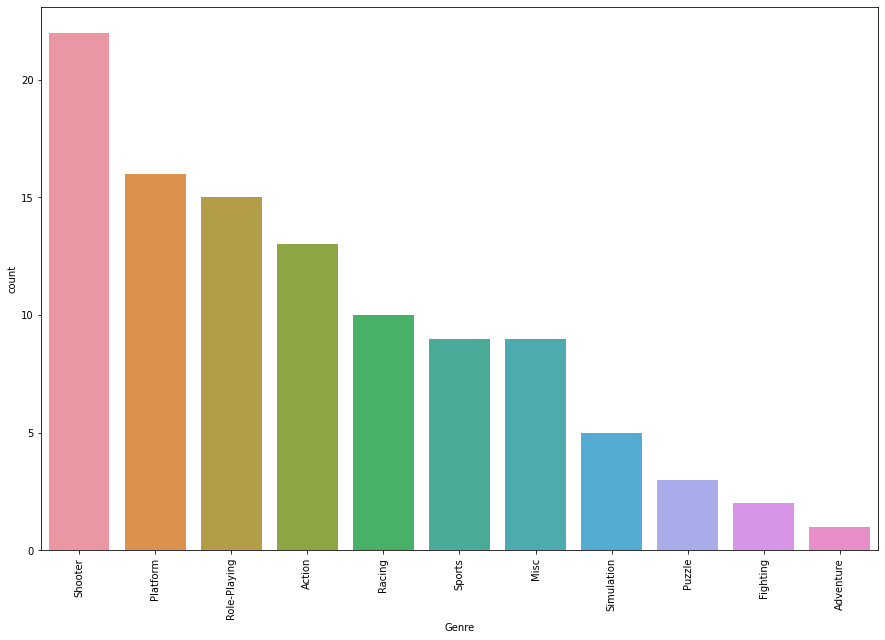

In [64]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=novodados1, order = novodados1['Genre'].value_counts().index)
plt.xticks(rotation=90)



---



**Gráfico 6 - Total de jogos lançados por ano**

Text(0.5, 1.0, 'Total de jogos lançados ao ano')

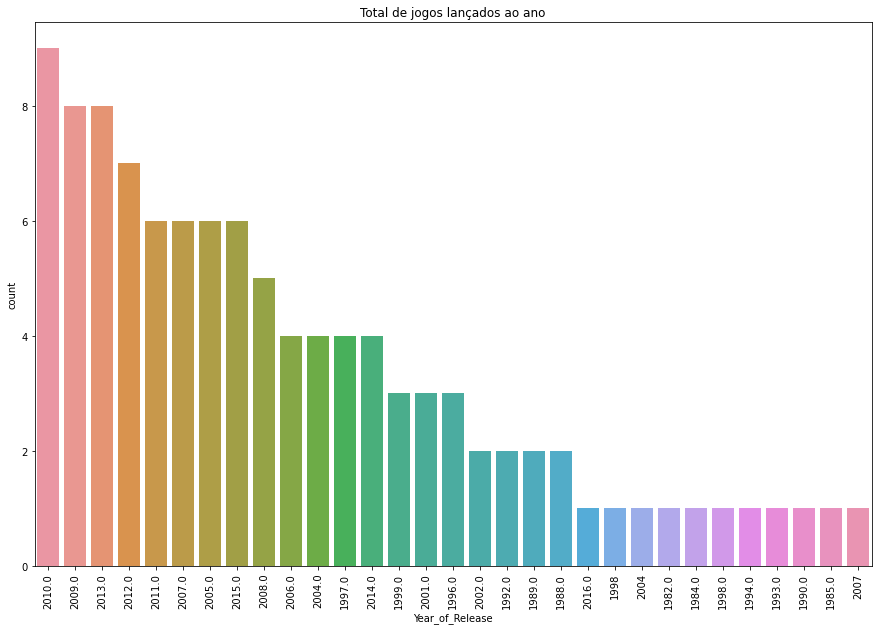

In [65]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=novodados1, order = novodados1.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Total de jogos lançados ao ano')



---



**Gráfico 7 - Os 5 anos com mais lançamento de jogos por gênero**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

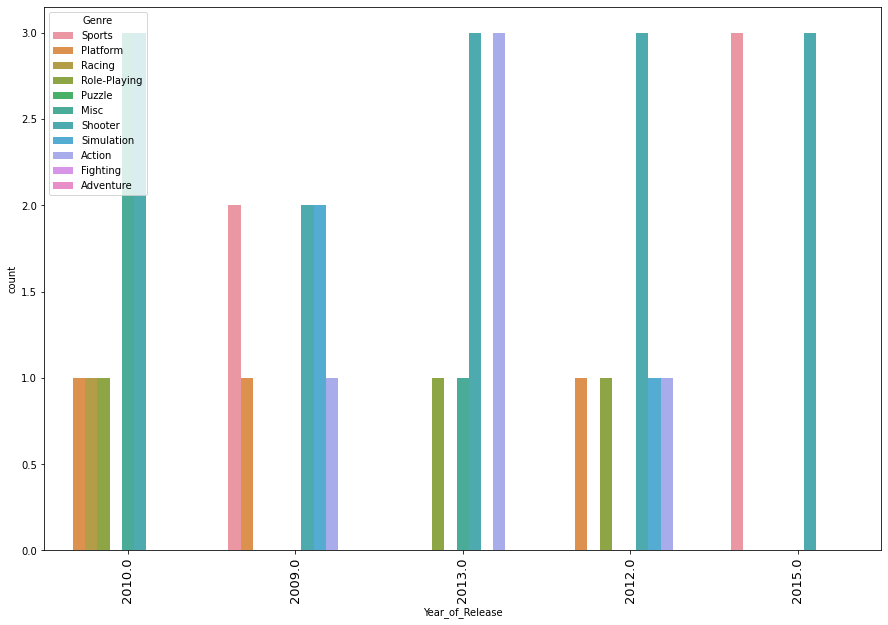

In [66]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=novodados1, hue='Genre', order=novodados1.Year_of_Release.value_counts().iloc[:5].index)
plt.xticks(size=13, rotation=90)

#**Tidy Data**

In [67]:
tidy_dataset = novodados1.drop('Global_Sales', axis=1)
tidy_dataset = tidy_dataset.rename({'NA_Sales': 'North_America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Other'}, axis=1)
tidy_dataset = pd.melt(tidy_dataset, id_vars=['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher'], var_name='Region', value_name='Sold_Millions_Units')

In [68]:
tidy_dataset[tidy_dataset.Name == 'Wii Sports']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,Region,Sold_Millions_Units
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,North_America,41.36
106,1,Wii Sports,Wii,2006.0,Sports,Nintendo,Europe,28.96
212,1,Wii Sports,Wii,2006.0,Sports,Nintendo,Japan,3.77
318,1,Wii Sports,Wii,2006.0,Sports,Nintendo,Other,8.45


In [69]:
tidy_dataset[tidy_dataset.Name == 'Wii Sports'].Sold_Millions_Units.sum()

82.53999999999999

In [70]:
novodados1[novodados1.Name == 'Wii Sports']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53


# **Corrigindo a rota**

**Compare o dataset1 e dataset2. Quais são as maiores diferenças? O que você acha que pode ter acontecido?**

O dataset2 (16719, 11) possui mais dados que o dataset1 (106, 11).
Além disso, os atributos do dataset2 já estão corrigidos para as colunas de Sales, mas o atributo do "Year_of_Release" está errdo (aparece como número, mas deveria ser data).


---



**Já o dataset3 é uma extensão do dataset2, combine-os e revise suas respostas dos passos anteriores (01, 02 e 03). De agora em diante, você usará apenas essa combinação de datasets (dataset2 e dataset3) e não mais o dataset1.**

O dataset3 (16719, 11) inclui novas categorias como "Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer" e "Rating".

# Obtendo informações sobre os Dataset2 e Dataset3

In [71]:
dados2.shape

(16719, 11)

In [72]:
dados3.shape

(16719, 12)

**Quantas linhas e quantas colunas esse dataset possui?**
* **Dataset2:** 16719 linhas e 11 colunas.
* **Dataset3:** 16719 linhas e 12 colunas.

In [73]:
dados2.columns

Index(['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [74]:
dados3.columns

Index(['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

**Dicionário das colunas do Dataset2 e Dataset3**


**Dataset2**
* **ID:** Número de identificação do jogo
* **Name:** Nome do jogo
* **Platform:** Plataforma em que o jogo foi lançado
* **Year_of_Release:** Ano de lançamento do jogo
* **Genre:** Gênero/categoria do jogo
* **Publisher:** Empresa responsável pela publicação/distribuição do jogo
* **NA_Sales:** Vendas na América do Norte
* **EU_Sales:** Vendas na Europa
* **JP_Sales:** Vendas no Japão
* **Other_Sales:** Vendas em outros lugares do mundo
* **Global_Sales:** Total de vendas global


---
**Dataset3**
* **ID:** Número de identificação do jogo
* **Name:** Nome do jogo
* **Platform:** Plataforma em que o jogo foi lançado
* **Year_of_Release:** Ano de lançamento do jogo
* **Genre:** Gênero/categoria do jogo
* **Publisher:** Empresa responsável pela publicação/distribuição do jogo
* **Critic_Score:** Pontuação do jogo dada pelo crítico
* **Critic_Count:** Número de críticos que avaliaram o jogo
* **User_Score:** Pontuação do jogo dada pelo usuário
* **User_Count:** Número de usuários que avaliaram o jogo
* **Developer:** Nome da empresa de desenvolvimento do jogo
* **Rating:** Classificação etária dos jogos (ESRB)


**Comparando as informações do dataset2 e dataset3**

O Dataset2 mostra as informações sobre as vendas dos jogos. Já o Dataset3 apresenta informações sobre crítica e avaliação dos jogos.

#Validação de dados e entendimento das variáveis

**Quantos registros faltantes (dados nulos) por coluna?**

In [75]:
dados2.isnull().sum() 

Id                   0
Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [76]:
dados3.isnull().sum()

Id                    0
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [77]:
dados2.dtypes

Id                   int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
dtype: object

In [78]:
dados3.dtypes

Id                   int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

**Há algum problema com os tipos das variáveis?**

Todas as variáveis do Dataset2 estão corretas. Já a variável "User_Score"está como object, mas deveria ser numeral (float64).


**Descreva o conteúdo de cada coluna, se atentando ao tipo de variável:**
1. Qualitativas: quantas categorias distintas? Qual a distribuição por categoria?
Temos duas categorias distintas: nominal (Name, Platform, Genre e Publisher) e ordinal (ID e Year_of_Release).

2. Quantitativas: valores mínimo e máximo. Média e desvio padrão. Mediana, P25 e P75.

In [79]:
dados2.describe()

,Id,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16719.000000,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,8360.000000,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543
std,4826.503911,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4180.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8360.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12539.500000,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,16719.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


In [80]:
dados2.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id                 8360.00
Year_of_Release    2007.00
NA_Sales              0.08
EU_Sales              0.02
JP_Sales              0.00
Other_Sales           0.01
Global_Sales          0.17
dtype: float64

# Combinação dos Dataset2 e Dataset3

Vamos criar o dataset "dadoscompletos" com todos os dados dos Dataset2 e Dataset3, considerando as colunas que são iguais para os dois (Id, Name, Platform, Years_of_Release, Genre e Publisher).

In [81]:
dadoscompletos = pd.merge(dados2, dados3, on=['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher'])

In [82]:
dadoscompletos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               16719 non-null  int64  
 1   Name             16717 non-null  object 
 2   Platform         16719 non-null  object 
 3   Year_of_Release  16450 non-null  float64
 4   Genre            16717 non-null  object 
 5   Publisher        16665 non-null  object 
 6   NA_Sales         16719 non-null  float64
 7   EU_Sales         16719 non-null  float64
 8   JP_Sales         16719 non-null  float64
 9   Other_Sales      16719 non-null  float64
 10  Global_Sales     16719 non-null  float64
 11  Critic_Score     8137 non-null   float64
 12  Critic_Count     8137 non-null   float64
 13  User_Score       10015 non-null  object 
 14  User_Count       7590 non-null   float64
 15  Developer        10096 non-null  object 
 16  Rating           9950 non-null   object 
dtypes: float64(9

In [83]:
dadoscompletos.head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
dadoscompletos.shape

(16719, 17)

O dataset "dadoscompletos"possui 16719 linhas e 17 colunas.

In [85]:
dadoscompletos[['Year_of_Release']].describe()

,Year_of_Release
count,16450.000000
mean,2006.487356
std,5.878995
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


Estão sendo considerados os jogos lançados entre 1980 e 2020.

**Quantos registros faltantes (dados nulos) por coluna?**

In [86]:
dadoscompletos.duplicated().sum()

0

In [87]:
dadoscompletos.isnull().sum()

Id                    0
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [88]:
dadoscompletos[dadoscompletos.Name.isnull()].head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,660,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,14247,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
dadoscompletos[dadoscompletos.Genre.isnull()].head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,660,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,14247,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


#Classificação etária dos jogos (Rating)

A classificação dos jogos é feita pela ESRB (Entertainment Software Rating Board), uma organização independente do governo que possui o sistema de classificação utilizado pelos jogos vendidos nos EUA, Canadá e América Latina. Na Europa a o sistema de classificação dos jogos (PEGI - Pan Europe Game Information) começou a ser usado em 2003 e segue a mesma descrição da ESRB.

In [90]:
dadoscompletos.Rating.value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Classificações da ESRB**
* **EC - Early Childhood:** crianças a partir de 3 anos.
* **E - Everyone:** contém conteúdo apropriado para maiores de 6 anos.
* **E10+ - Everyone 10+:** conteúdo considerado impróprio para menores de 10 anos (*obs*: começou a ser utilizado apenas em 2005).
* **T - Teen:** contém conteúdo considerado impróprio para menores de 13 anos (*obs*: classificação usada quando não existia o E10+).
* **M - Mature:** contém conteúdo considerado impróprio para menores de 17 anos.
* **AO - Adults Only:** contém conteúdo impróprio para menores de 18 anos (*obs*: Nintendo, Sony e Microsoft não permitem que jogos com essa classificação sejam lançados para suas plataformas).
* **K-A - Kids to Adults:** contém conteúdo destinado a menores de 6 anos, podendo agradar pessoas com mais idade (*obs*: a partir de 1998 foi substituída pela E).
* **RP - Rating Pending:** o jogo ainda não foi classificado pela ESRB.


In [91]:
dadoscompletos[dadoscompletos.Rating == 'AO']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
875,876,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO


In [92]:
dadoscompletos[dadoscompletos.Rating == 'RP']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13673,13674,Clockwork Empires,PC,NaN,Strategy,Unknown,0.0,0.04,0.0,0.00,0.04,58.0,7.0,3.8,5.0,Gaslamp Games,RP
14272,14273,Supreme Ruler: Cold War,PC,2011.0,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP
16182,16183,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,0.0,0.01,0.0,0.00,0.01,65.0,7.0,NaN,NaN,Black Bean Games,RP


In [ ]:
dadoscompletos[dadoscompletos.Rating == 'K-A']

#Empresas de Desenvolvimento de jogos (Developer)

In [93]:
dadoscompletos.Developer.isnull().sum()

6623

In [94]:
dadoscompletos[['Developer']].describe()

,Developer
count,10096
unique,1696
top,Ubisoft
freq,204


In [96]:
dadoscompletos.Developer.value_counts()

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [95]:
dadoscompletos[dadoscompletos.Developer == 'Nintendo'].value_counts().sum()

68

#Plataformas onde os jogos foram lançados (Platform)

In [97]:
dadoscompletos.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#Empresas responsáveis pela publicação/distribuição dos jogos (Publisher)

In [98]:
novodados1.Publisher.value_counts()

Nintendo                       52
Activision                     15
Take-Two Interactive           10
Sony Computer Entertainment     8
Electronic Arts                 8
Microsoft Game Studios          6
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: Publisher, dtype: int64

#Informações sobre as avaliações dos críticos e dos usuários

A avaliação dos críticos (Critic_Score) segue uma pontuação de 0 a 100, enquanto a dos usuários (User_Score) é de 0 a 10.

In [99]:
dadoscompletos.Critic_Score.value_counts().head()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
Name: Critic_Score, dtype: int64

In [100]:
dadoscompletos.User_Score.value_counts().head()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
Name: User_Score, dtype: int64

#Informações sobre as Vendas

In [101]:
dadoscompletos[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg('sum')

NA_Sales       4402.62
EU_Sales       2424.67
JP_Sales       1297.43
Other_Sales     791.34
dtype: float64

Comparando o valor das vendas por região, a América do Norte corresponde a quase 50% do total de vendas.

In [102]:
dadoscompletos[dadoscompletos['JP_Sales']>1]['Publisher'].value_counts()[:10]

Nintendo                        126
Sony Computer Entertainment      16
SquareSoft                       14
Namco Bandai Games               12
Enix Corporation                 11
Konami Digital Entertainment     11
Square Enix                      10
Capcom                           10
Hudson Soft                       4
ASCII Entertainment               4
Name: Publisher, dtype: int64

No mercado Japonês a Nintendo domina as vendas com 126 jogos, seguida pela Sony com apenas 16 títulos.

In [103]:
dadoscompletos[dadoscompletos['NA_Sales']>1]['Publisher'].value_counts()[:10]

Nintendo                       171
Electronic Arts                144
Activision                      81
Sony Computer Entertainment     75
Take-Two Interactive            53
Ubisoft                         46
THQ                             40
Microsoft Game Studios          37
Sega                            27
Atari                           26
Name: Publisher, dtype: int64

O mesmo acontece no mercado Norte Americano. A Nintendo possui 171 jogos, mas a diferença para a segunda maior empresa divulgadora é menor, Electronic Arts com 144 títulos.

In [104]:
dadoscompletos[dadoscompletos['NA_Sales']>1]['Genre'].value_counts()

Action          187
Shooter         132
Sports          130
Platform         97
Misc             80
Racing           72
Role-Playing     64
Fighting         59
Simulation       34
Puzzle           20
Strategy         15
Adventure        14
Name: Genre, dtype: int64

Os três gêneros mais comprados na América do Norte são: action, shooter e sports. E o menos procurado é o de adventure.

In [105]:
dadoscompletos[dadoscompletos['NA_Sales']>1]['Platform'].value_counts()[:10]

PS2     146
X360    130
PS       87
PS3      84
Wii      79
DS       54
N64      35
PS4      33
PC       31
GBA      30
Name: Platform, dtype: int64

#Tidy Data

In [106]:
tidy_dataset2 = dadoscompletos.drop('Global_Sales', axis=1)
tidy_dataset2 = tidy_dataset2.rename({'NA_Sales': 'North_America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Other'}, axis=1)
tidy_dataset2 = pd.melt(tidy_dataset2, id_vars=['Id', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], var_name='Region', value_name='Sold_Millions_Units')

In [107]:
tidy_dataset2[tidy_dataset2.Name == 'Donkey Kong']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Region,Sold_Millions_Units
454,455,Donkey Kong,GB,1994.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,North_America,1.57
1305,1306,Donkey Kong,2600,1981.0,Platform,Coleco,NaN,NaN,NaN,NaN,NaN,NaN,North_America,1.36
1809,1810,Donkey Kong,NES,1983.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,North_America,0.23
17173,455,Donkey Kong,GB,1994.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,Europe,0.62
18024,1306,Donkey Kong,2600,1981.0,Platform,Coleco,NaN,NaN,NaN,NaN,NaN,NaN,Europe,0.08
18528,1810,Donkey Kong,NES,1983.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,Europe,0.05
33892,455,Donkey Kong,GB,1994.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,Japan,0.55
34743,1306,Donkey Kong,2600,1981.0,Platform,Coleco,NaN,NaN,NaN,NaN,NaN,NaN,Japan,0.00
35247,1810,Donkey Kong,NES,1983.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,Japan,0.84
50611,455,Donkey Kong,GB,1994.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,Other,0.34


# Gráficos

**Gráfico 8 - Lançamento de jogos por gênero**

Text(0.5, 0, 'Gênero dos jogos')

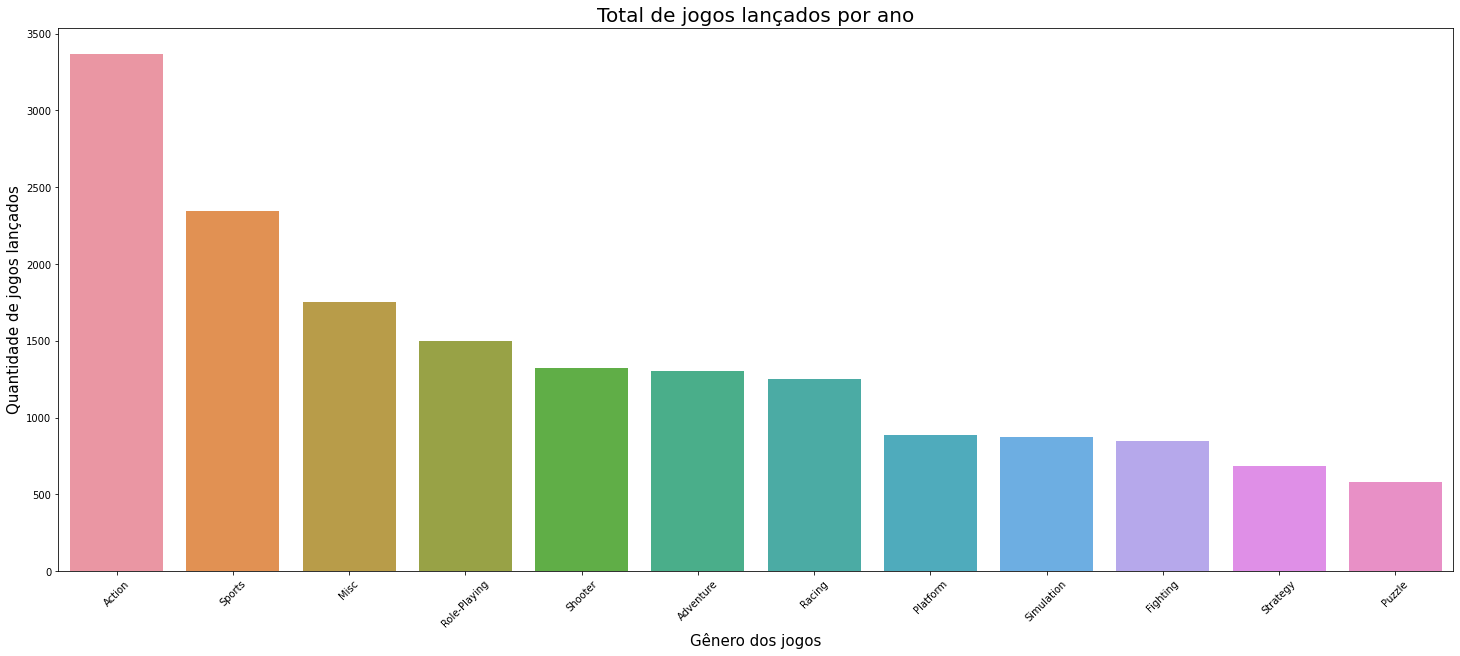

In [108]:
plt.figure(figsize=(25, 10))
fsize=20
lsize=15
sns.countplot(x="Genre", data=dadoscompletos, order = dadoscompletos['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Total de jogos lançados por ano', fontsize=fsize)
plt.ylabel('Quantidade de jogos lançados', fontsize=lsize)
plt.xlabel('Gênero dos jogos', fontsize=lsize)



---



**Gráfico 9 - Total de jogos lançados por ano**

O gráfico mostra do ano (2008) com maior número de jogos lançados para o menor (2020).

Text(0.5, 0, 'Ano de lançamento')

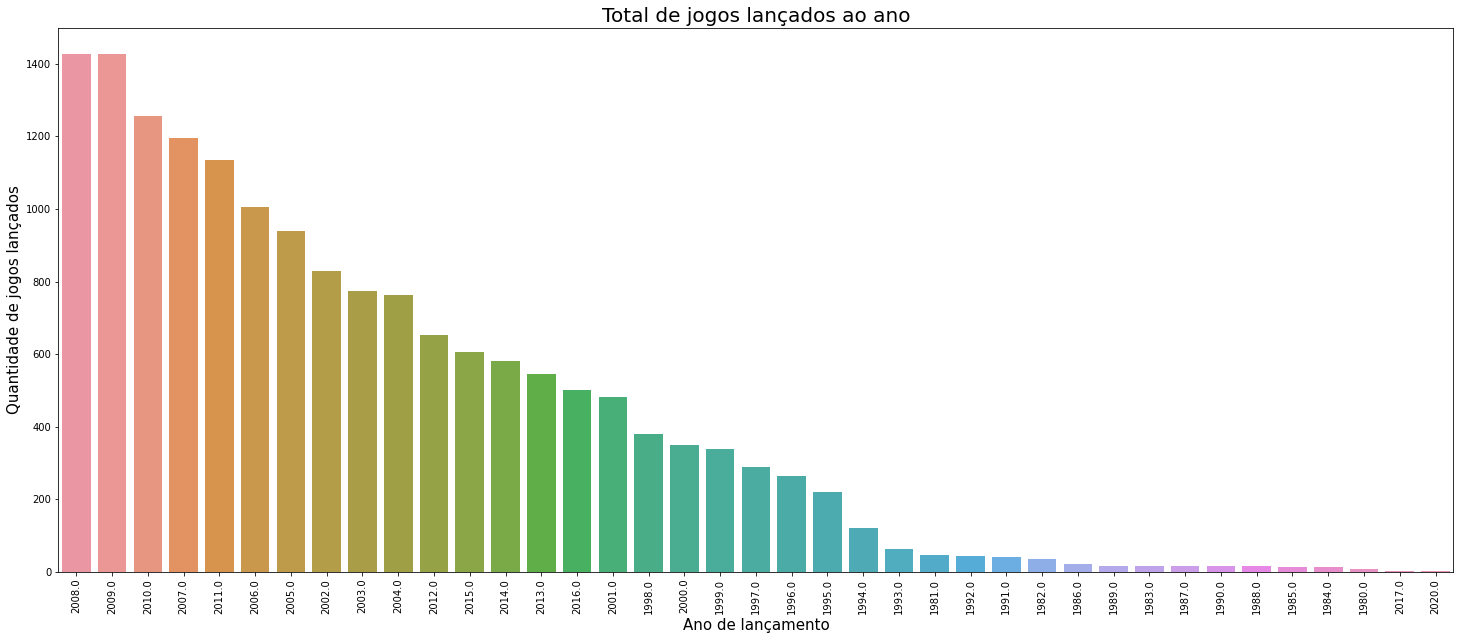

In [109]:
plt.figure(figsize=(25, 10))
fsize=20
lsize=15
sns.countplot(x="Year_of_Release", data=dadoscompletos, order = dadoscompletos.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Total de jogos lançados ao ano', fontsize=fsize)
plt.ylabel('Quantidade de jogos lançados', fontsize=lsize)
plt.xlabel('Ano de lançamento', fontsize=lsize)



---



**Gráfico 10 - Número de jogos por ano de lançamento**

O gráfico mostra os anos em ordem crescente (1980 - 2017).
Comparando com o gráfico 9, conseguimos visualizar melhor que o número de jogos lançados aumentou ao longo dos anos e teve sua máxima em 2008 e, a partir disso, esse número foi diminuindo.

Text(0, 0.5, 'Número de jogos')

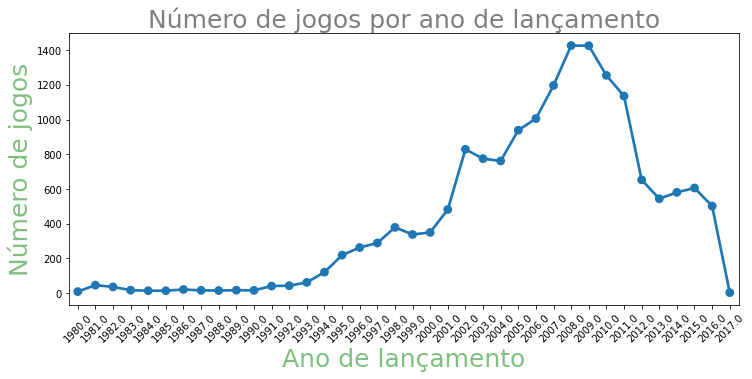

In [110]:
titles_by_year = dadoscompletos.groupby(['Year_of_Release']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(12,5))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Name)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Número de jogos por ano de lançamento', size=25, color='black', alpha=0.5)
ax.set_xlabel('Ano de lançamento', size=25, color='green', alpha=0.5)
ax.set_ylabel('Número de jogos', size=25, color='green', alpha=0.5)

**Gráfico 11 - Os 5 anos com mais lançamento de jogos por gênero**

Text(0.5, 0, 'Ano de lançamento')

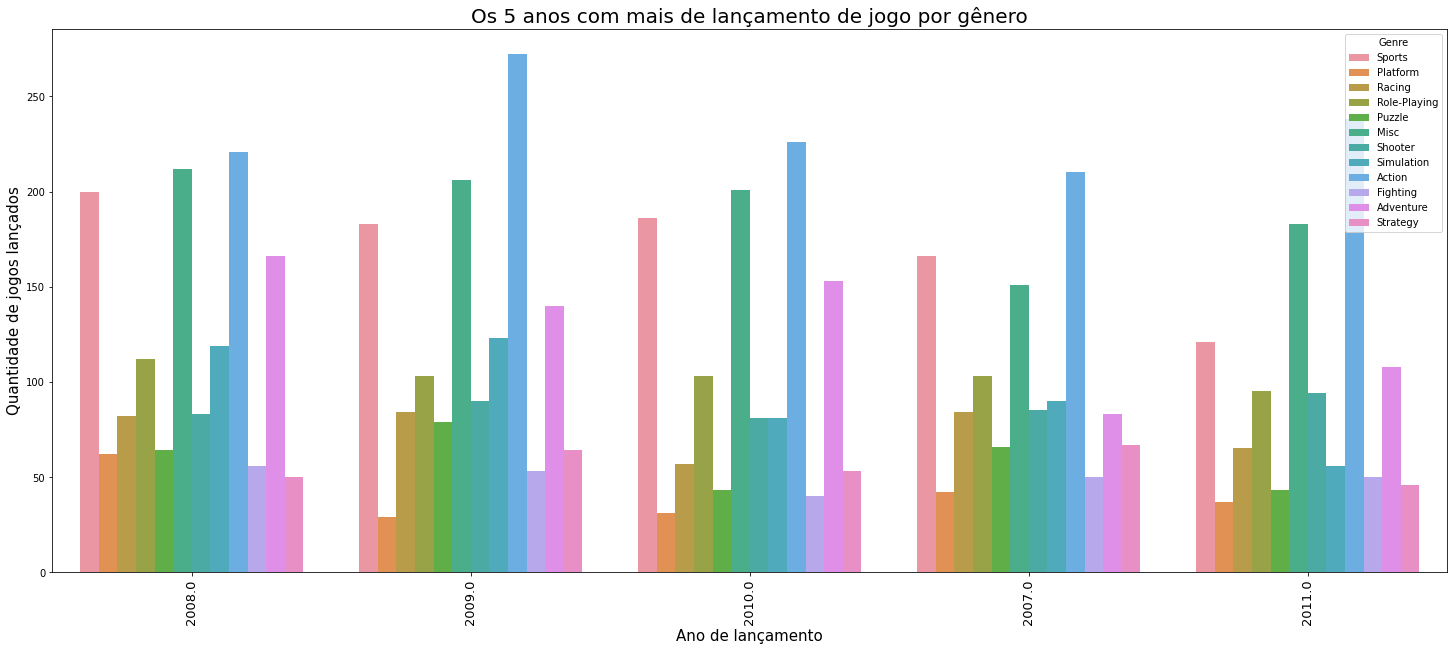

In [111]:
plt.figure(figsize=(25, 10))
fsize=20
lsize=15
sns.countplot(x="Year_of_Release", data=dadoscompletos, hue='Genre', order=dadoscompletos.Year_of_Release.value_counts().iloc[:5].index)
plt.xticks(size=13, rotation=90)
plt.title('Os 5 anos com mais de lançamento de jogo por gênero', fontsize=fsize)
plt.ylabel('Quantidade de jogos lançados', fontsize=lsize)
plt.xlabel('Ano de lançamento', fontsize=lsize)

**Gráfico 12 - Total de vendas global por gênero**

Text(0, 0.5, 'Total de Vendas Global')

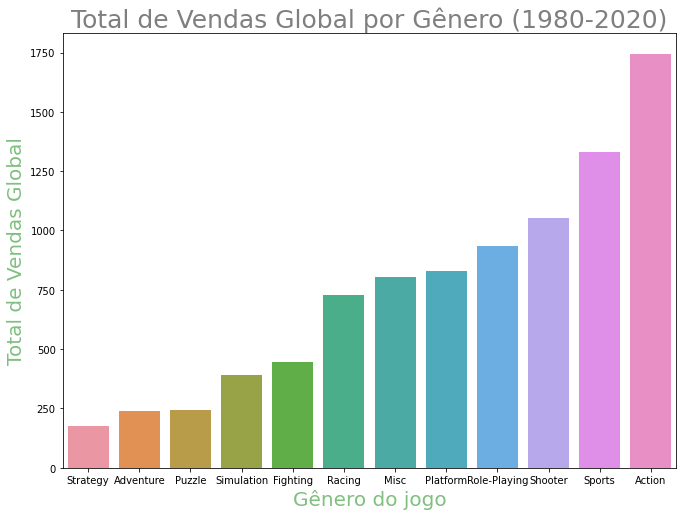

In [112]:
global_sales_by_genre = dadoscompletos.groupby('Genre').agg({'Global_Sales' :np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(11,8))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales)
ax.set_title('Total de Vendas Global por Gênero (1980-2020)', color='black', size=25, alpha=0.5)
ax.set_xlabel('Gênero do jogo', color='green', size=20, alpha=0.5)
ax.set_ylabel('Total de Vendas Global', color='green', size=20, alpha=0.5)

**Gráfico 13 - As 10 Distribuidoras por Venda Global**

Text(0, 0.5, 'Vendas')

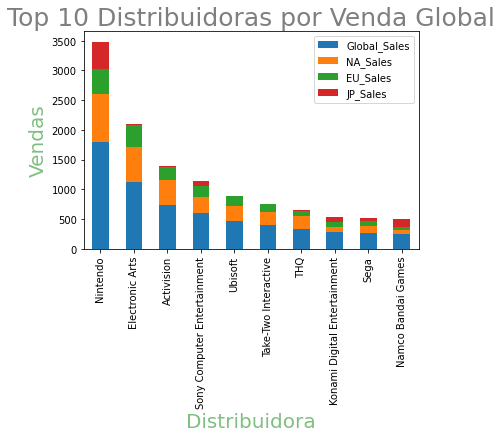

In [115]:
global_sales_publisher = dadoscompletos.pivot_table(index=['Publisher'], values=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'], 
                                                    aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Distribuidoras por Venda Global', color='black', size=25, alpha=0.5)
ax.set_xlabel('Distribuidora', color='green', size=20, alpha=0.5)
ax.set_ylabel('Vendas', color='green', size=20, alpha=0.5)



---




**Gráfico 14 - Total de Vendas por Plataformas**

Text(0, 0.5, 'Total de Vendas Global')

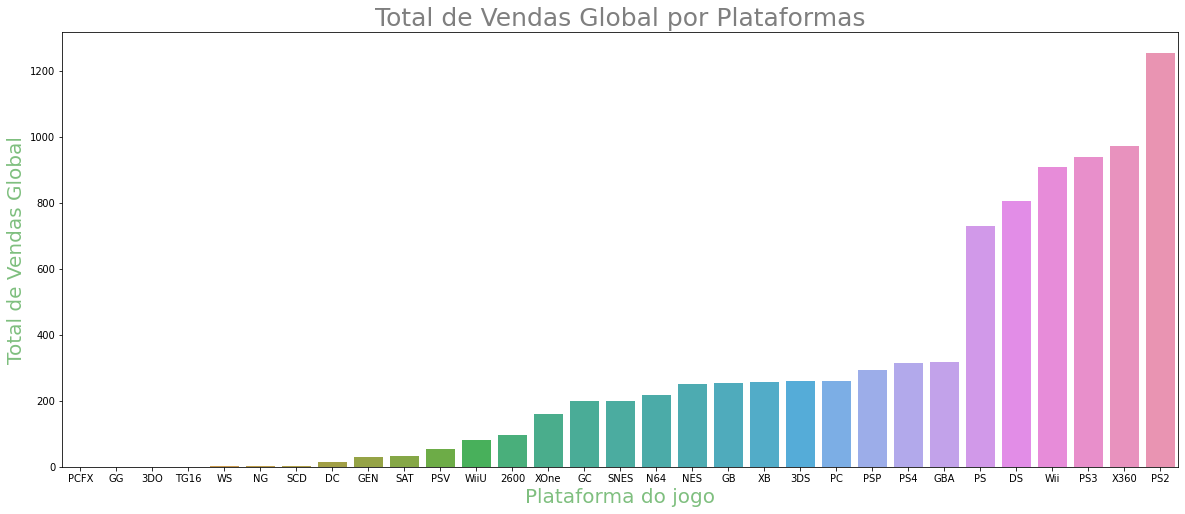

In [116]:
global_sales_by_platform = dadoscompletos.groupby('Platform').agg({'Global_Sales' :np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(20,8))
ax = sns.barplot(x=global_sales_by_platform.index, y=global_sales_by_platform.Global_Sales)
ax.set_title('Total de Vendas Global por Plataformas', color='black', size=25, alpha=0.5)
ax.set_xlabel('Plataforma do jogo', color='green', size=20, alpha=0.5)
ax.set_ylabel('Total de Vendas Global', color='green', size=20, alpha=0.5)

#**Algumas considerações sobre o case:**

* Os dados correspondem ao período de tempo de 40 anos, entre 1980 e 2020.
O ano com mais lançamentos foi 2008 (total de 1427 jogos) e em 2020 só foi lançado 1 jogo.
Podemos observar que em 1993 foram lançados 62 jogos e no ano seguinte esse número dobrou (121 jogos). Uma explicação para isso é que em 1994 a Sony entrou no mercado de videogames com o lançamento do seu primeiro console, o PlayStation.

* Também vemos que as vendas aumentaram ao longo dos anos, mas a partir de 2008 o número de jogos em mídias físicas diminuiu e o dataset fornecido não contempla as vendas de jogos online em plataformas (ex: Steam). Essa queda no número de vendas pode ser justificada pelo aumento do uso de smartphones e mais jogos desenvolvidos para o mobile (IOS e Android).
Além disso, os consoles lançados nos últimos anos não possuem mais entrada para mídia física e os jogos começam a ser lançados em mídia digital.

* Quanto ao gênero/categoria, os jogos de action são os mais vendidos mundialmente, seguidos por sports. Já os de strategy tem o menor número de vendas global.

* Uma das possíveis fontes do Dataset3 pode ser o site Metacritic https://www.metacritic.com/, onde os jogos podem ser avaliados pelos críticos (pontuação de 0 a 100) e pelos usuários (pontuação de 0 a 10).
O site também apresenta outras informações sobre os jogos como ano de lançamento, empresa que desenvolveu, classificação segundo a EBSR, entre outras.

* Com relação a classificação dos jogos (Rating), a maioria do nosso banco de dados é "E - Everyone", ou seja, jogos que contém conteúdo indicado para todas as idades. 
Jogos com classificação "AO - Adults Only", com conteúdo considerado impróprio para menores de 18 anos, temos apenas 1 no banco de dados (Grand Theft Auto: San Andreas).

* Entre as empresas de desenvolvimento de jogos, a Ubisoft é a que possui mais jogos (204), seguida pela EA Sports (172) e a EA Canada (167). A Nintendo é responsável pelo desenvolvimento de 68 jogos.

* As 5 empresas (Publisher) com maior número de jogos distribuídos são: Nintendo, Activision, Take-Two Interactive, Sony Computer Entertainment e Electronic Arts. Mas se analisarmos o total de vendas temos: Nintendo, Eletronic Arts, Activision, Sony Computer Entertainment e Ubisoft.

* Com relação a Plataforma do jogo, as 5 com mais jogos lançados são: PS2 (2161 jogos), DS (2152 jogos), PS3 (1331 jogos), Wii (1320 jogos) e X360 (1262 jogos). Ao considerar o total de vendas a ordem altera um pouco: PS2, X360, PS3, Wii e DS.